<a href="https://colab.research.google.com/github/Joan-yy/AnxietyLevelPrediction/blob/main/XGBoost_Regression_FINALIZE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# STEP 1: Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from scipy.stats import uniform, randint

# STEP 2: Load and preprocess dataset
df = pd.read_csv('/content/enhanced_anxiety_dataset.csv')

# Fill missing values
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        df[col].fillna(df[col].mean(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

# Encode binary variables
binary_cols = ['Gender', 'Smoking', 'Family History of Anxiety', 'Dizziness', 'Medication', 'Recent Major Life Event']
for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0})

# One-hot encode 'Occupation'
df = pd.get_dummies(df, columns=['Occupation'], drop_first=True)

# Target and Features
X = df.drop(columns=['Anxiety Level (1-10)'])
y = df['Anxiety Level (1-10)']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


FileNotFoundError: [Errno 2] No such file or directory: '/content/enhanced_anxiety_dataset.csv'

Untuned XGBoost Regressor

🔹 UNTUNED XGBoost Regressor
MSE: 1.1565468311309814
MAE: 0.8686062693595886
R² Score: 0.7487301826477051


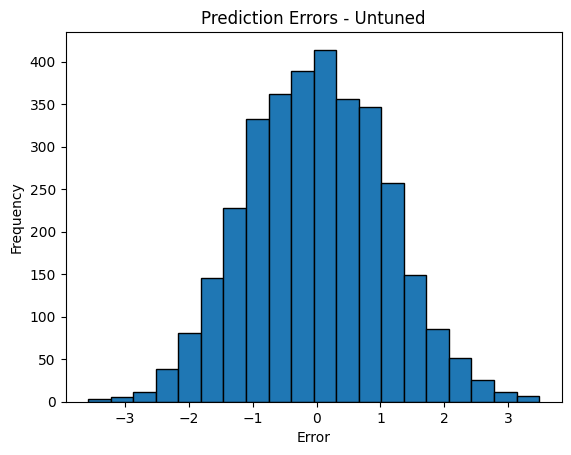

In [ ]:
# Untuned XGBoost Regressor
model_untuned = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
model_untuned.fit(X_train, y_train)
y_pred_untuned = model_untuned.predict(X_test)

# Evaluation metrics
print("🔹 UNTUNED XGBoost Regressor")
print("MSE:", mean_squared_error(y_test, y_pred_untuned))
print("MAE:", mean_absolute_error(y_test, y_pred_untuned))
print("R² Score:", r2_score(y_test, y_pred_untuned))

# Plot prediction error
errors = y_test - y_pred_untuned
plt.hist(errors, bins=20, edgecolor='black')
plt.title("Prediction Errors - Untuned")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.show()


Tuning XGBoost Regressor

In [ ]:
# Define parameter grid
param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'gamma': uniform(0, 0.5),
    'reg_alpha': uniform(0, 1),
    'reg_lambda': uniform(0, 1)
}

search = RandomizedSearchCV(
    estimator=xgb.XGBRegressor(objective='reg:squarederror', random_state=42),
    param_distributions=param_dist,
    n_iter=50,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

search.fit(X_train, y_train)

print("✅ Best Parameters from Tuning:")
print(search.best_params_)


Fitting 3 folds for each of 50 candidates, totalling 150 fits
✅ Best Parameters from Tuning:
{'colsample_bytree': np.float64(0.8232408008069365), 'gamma': np.float64(0.2019180855290204), 'learning_rate': np.float64(0.029467674132694466), 'max_depth': 4, 'n_estimators': 151, 'reg_alpha': np.float64(0.2468760628386012), 'reg_lambda': np.float64(0.6963042728397884), 'subsample': np.float64(0.8849082359697769)}


🔹 TUNED XGBoost Regressor
MSE: 1.0089893341064453
MAE: 0.8110315799713135
R² Score: 0.7807883024215698


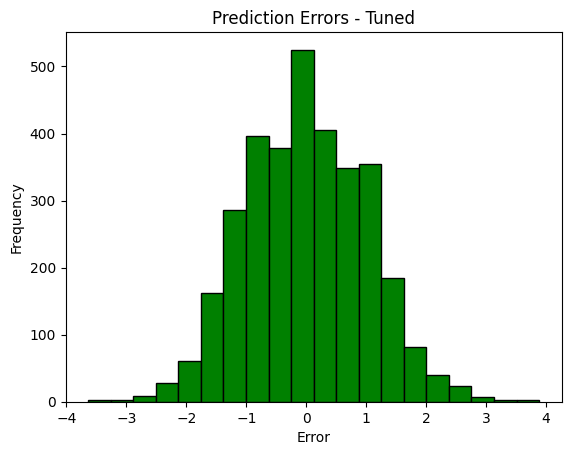

In [ ]:
# Train best model from tuning
model_tuned = xgb.XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    **search.best_params_
)

model_tuned.fit(X_train, y_train)
y_pred_tuned = model_tuned.predict(X_test)

# Evaluation metrics
print("🔹 TUNED XGBoost Regressor")
print("MSE:", mean_squared_error(y_test, y_pred_tuned))
print("MAE:", mean_absolute_error(y_test, y_pred_tuned))
print("R² Score:", r2_score(y_test, y_pred_tuned))

# Plot prediction error
errors = y_test - y_pred_tuned
plt.hist(errors, bins=20, edgecolor='black', color='green')
plt.title("Prediction Errors - Tuned")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.show()


Changing it into 3 Category of Anxiety Level

In [ ]:
# STEP 1: Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from scipy.stats import uniform, randint

# STEP 2: Load and preprocess dataset
df = pd.read_csv('/content/enhanced_anxiety_dataset.csv')

# Fill missing values
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        df[col].fillna(df[col].mean(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

# Encode binary variables
binary_cols = ['Gender', 'Smoking', 'Family History of Anxiety', 'Dizziness', 'Medication', 'Recent Major Life Event']
for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0})

# One-hot encode 'Occupation'
df = pd.get_dummies(df, columns=['Occupation'], drop_first=True)

# Features and Target
X = df.drop(columns=['Anxiety Level (1-10)'])
y = df['Anxiety Level (1-10)']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Anxiety level to category
def map_anxiety(score):
    if score <= 3:
        return 'Low'
    elif score <= 6:
        return 'Medium'
    else:
        return 'High'


<ipython-input-7-2987523371>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
<ipython-input-7-2987523371>:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.me

Resullt for the Untuned XGBoost Regressor

🔹 UNTUNED XGBoost Regressor
MSE: 1.2324242424242424
MAE: 0.8384848484848485
R² Score: 0.7322451326723363
Accuracy: 0.7727272727272727
F1 Score (Macro): 0.8098868264654895

Classification Report:
               precision    recall  f1-score   support

        High       0.98      0.87      0.92       357
         Low       0.77      0.78      0.78      1543
      Medium       0.73      0.74      0.73      1400

    accuracy                           0.77      3300
   macro avg       0.83      0.80      0.81      3300
weighted avg       0.78      0.77      0.77      3300



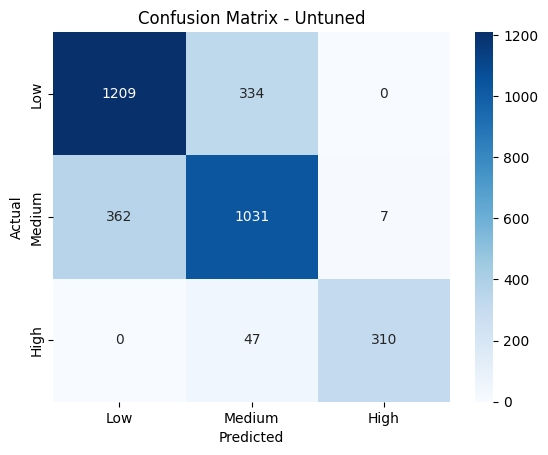

In [ ]:
model_untuned = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
model_untuned.fit(X_train, y_train)
y_pred_untuned = model_untuned.predict(X_test)
y_pred_round = np.round(y_pred_untuned).astype(int)

# Metrics
print("🔹 UNTUNED XGBoost Regressor")
print("MSE:", mean_squared_error(y_test, y_pred_round))
print("MAE:", mean_absolute_error(y_test, y_pred_round))
print("R² Score:", r2_score(y_test, y_pred_round))

# Convert to category
y_pred_cat = pd.Series(y_pred_round).apply(map_anxiety)
y_true_cat = y_test.apply(map_anxiety)

# Classification Metrics
print("Accuracy:", accuracy_score(y_true_cat, y_pred_cat))
print("F1 Score (Macro):", f1_score(y_true_cat, y_pred_cat, average='macro'))
print("\nClassification Report:\n", classification_report(y_true_cat, y_pred_cat))

# Confusion Matrix
cm = confusion_matrix(y_true_cat, y_pred_cat, labels=["Low", "Medium", "High"])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Low", "Medium", "High"], yticklabels=["Low", "Medium", "High"])
plt.title("Confusion Matrix - Untuned")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Tuning the XGBoost Regressor

In [ ]:
param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'gamma': uniform(0, 0.5),
    'reg_alpha': uniform(0, 1),
    'reg_lambda': uniform(0, 1)
}

search = RandomizedSearchCV(
    estimator=xgb.XGBRegressor(objective='reg:squarederror', random_state=42),
    param_distributions=param_dist,
    n_iter=50,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

search.fit(X_train, y_train)

print("✅ Best Parameters from Tuning:")
print(search.best_params_)


Fitting 3 folds for each of 50 candidates, totalling 150 fits
✅ Best Parameters from Tuning:
{'colsample_bytree': np.float64(0.8232408008069365), 'gamma': np.float64(0.2019180855290204), 'learning_rate': np.float64(0.029467674132694466), 'max_depth': 4, 'n_estimators': 151, 'reg_alpha': np.float64(0.2468760628386012), 'reg_lambda': np.float64(0.6963042728397884), 'subsample': np.float64(0.8849082359697769)}


Result for the Tuned XGBoost Regressor

🔹 TUNED XGBoost Regressor
MSE: 1.072121212121212
MAE: 0.7763636363636364
R² Score: 0.7670723578546166
Accuracy: 0.7936363636363636
F1 Score (Macro): 0.8267188970300587

Classification Report:
               precision    recall  f1-score   support

        High       0.98      0.87      0.92       357
         Low       0.79      0.80      0.80      1543
      Medium       0.75      0.77      0.76      1400

    accuracy                           0.79      3300
   macro avg       0.84      0.81      0.83      3300
weighted avg       0.80      0.79      0.79      3300



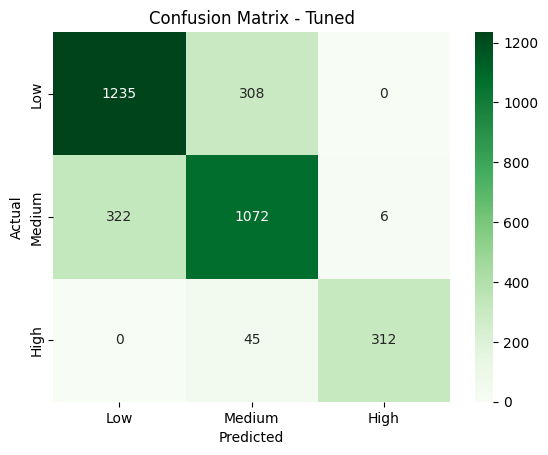

In [ ]:
model_tuned = xgb.XGBRegressor(objective='reg:squarederror', random_state=42, **search.best_params_)
model_tuned.fit(X_train, y_train)
y_pred_tuned = model_tuned.predict(X_test)
y_pred_round_tuned = np.round(y_pred_tuned).astype(int)

print("🔹 TUNED XGBoost Regressor")
print("MSE:", mean_squared_error(y_test, y_pred_round_tuned))
print("MAE:", mean_absolute_error(y_test, y_pred_round_tuned))
print("R² Score:", r2_score(y_test, y_pred_round_tuned))

# Convert to categories
y_pred_cat_tuned = pd.Series(y_pred_round_tuned).apply(map_anxiety)
y_true_cat = y_test.apply(map_anxiety)  # Already defined

# Classification Metrics
print("Accuracy:", accuracy_score(y_true_cat, y_pred_cat_tuned))
print("F1 Score (Macro):", f1_score(y_true_cat, y_pred_cat_tuned, average='macro'))
print("\nClassification Report:\n", classification_report(y_true_cat, y_pred_cat_tuned))

# Confusion Matrix
cm = confusion_matrix(y_true_cat, y_pred_cat_tuned, labels=["Low", "Medium", "High"])
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=["Low", "Medium", "High"], yticklabels=["Low", "Medium", "High"])
plt.title("Confusion Matrix - Tuned")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
# Save model
# Import joblib
import joblib

# Change 'model' to the correct variable name for the tuned model, which is 'model_tuned'
joblib.dump(model_tuned, 'model.pkl')

# Save columns to use in Streamlit app
joblib.dump(X.columns.tolist(), 'model_features.pkl')

from google.colab import files
files.download('model.pkl')
files.download('model_features.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>